## Problem Statement

Kanav has started his own Pizza Store by getting the Franchise from the popular Pizza brand Diminos. 
Diminos promises to deliver the pizza order within 31 minutes from the time the order was placed. Otherwise the pizza will be free for the customer.
In order to increase the revenue and profits Kanav is running the store 24 * 7.
Recently Diminos gave a notice to Kanav that they will be measuring their stores' performance by looking at the metric - which is 95th Percentile on Order Delivery time should be less than 31 mins.
Kanav is worried that he might lose the franchise if he is not able to meet the metric and wants your help in order to understand his store's performance so that he can take some actions to prevent his business. 

In [41]:
import pandas as pd

In [42]:
df = pd.read_csv(r"D:\Data Science\Innomatics Internship\Data Analysis\Domino Case Study Assignment\diminos_data.csv")

In [43]:
df

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056
...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358


In [44]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [45]:
df["order_placed_at"] = pd.to_datetime(df["order_placed_at"])
df["order_delivered_at"] = pd.to_datetime(df["order_delivered_at"])

In [46]:
df["day_of_month"] = df["order_placed_at"].dt.day

In [47]:
df["day_of_week"] = df["order_placed_at"].dt.day_name()

In [48]:
df.head()

,order_id,order_placed_at,order_delivered_at,day_of_month,day_of_week
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,1,Wednesday
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,1,Wednesday
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,1,Wednesday
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,1,Wednesday
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,1,Wednesday


In [49]:
df["day_of_month"].value_counts()

20    597
22    591
2     588
10    587
23    583
6     582
12    582
8     578
7     570
4     567
24    565
9     564
18    559
27    551
5     551
1     550
25    547
16    545
15    540
17    537
11    536
3     534
26    532
19    526
13    526
21    520
14    492
Name: day_of_month, dtype: int64

<AxesSubplot: >

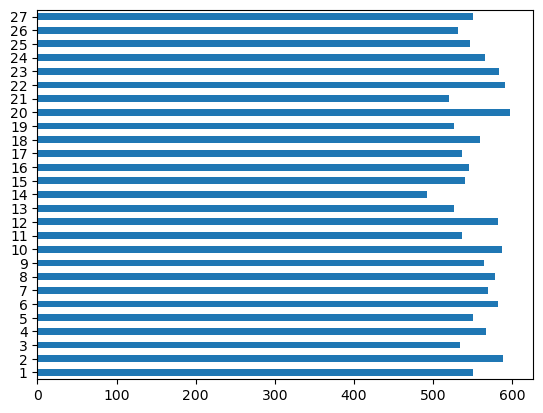

In [50]:
df["day_of_month"].value_counts().sort_index().plot(kind='barh')

<AxesSubplot: >

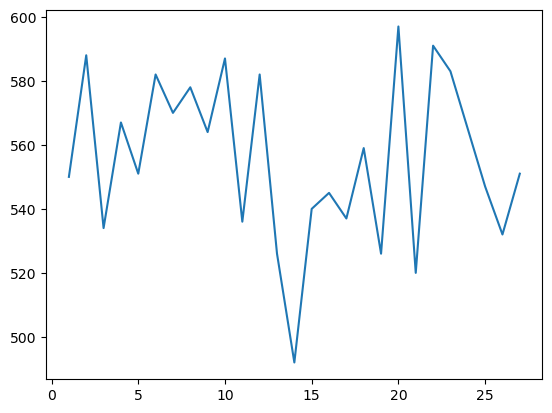

In [51]:
df["day_of_month"].value_counts().sort_index().plot(kind='line')

In [52]:
df["day_of_week"].value_counts()

Thursday     2280
Wednesday    2259
Monday       2256
Friday       2223
Saturday     2209
Sunday       2191
Tuesday      1582
Name: day_of_week, dtype: int64

<AxesSubplot: >

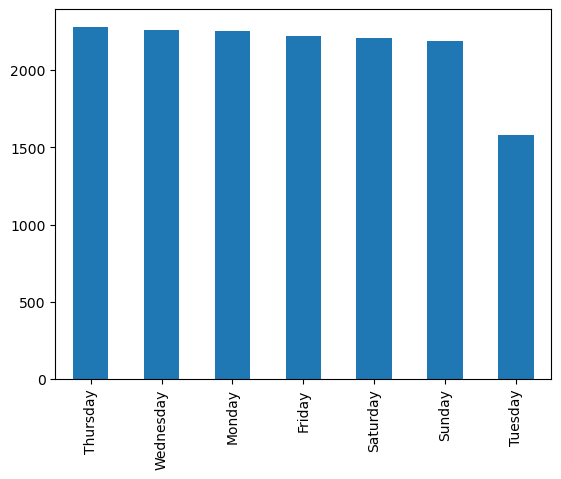

In [53]:
df["day_of_week"].value_counts().plot(kind='bar')

In [54]:
df["delivery_time"] = df["order_delivered_at"] - df["order_placed_at"]
df.head()

,order_id,order_placed_at,order_delivered_at,day_of_month,day_of_week,delivery_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,1,Wednesday,0 days 00:17:08.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,1,Wednesday,0 days 00:15:35.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,1,Wednesday,0 days 00:15:06.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,1,Wednesday,0 days 00:38:32.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,1,Wednesday,0 days 00:16:10.619056


In [55]:
df["delivery_time"] = df["delivery_time"].dt.total_seconds() / 60
df.head()

,order_id,order_placed_at,order_delivered_at,day_of_month,day_of_week,delivery_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,1,Wednesday,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,1,Wednesday,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,1,Wednesday,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,1,Wednesday,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,1,Wednesday,16.176984


In [56]:
df["delivery_time"].mean()

20.499389326467778

In [57]:
df["delivery_time"].median()

15.797986066666667

In [58]:
df["delivery_time"].std()

96.16036180216469

In [59]:
df["delivery_time"].quantile(0.25)

15.274825995833332

In [60]:
df["delivery_time"].quantile(0.75)

17.27966090416667

<AxesSubplot: >

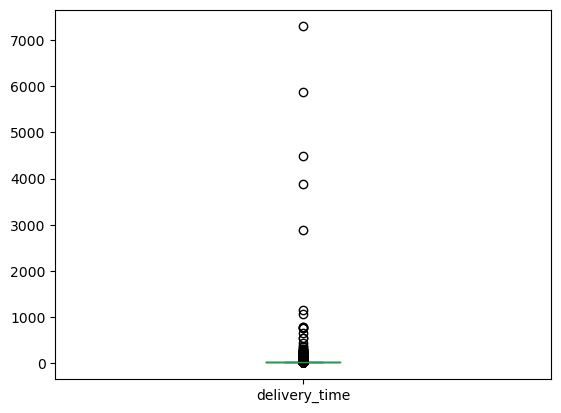

In [61]:
df["delivery_time"].plot(kind='box')

In [62]:
df[df["delivery_time"] > 31].shape

(557, 6)

<AxesSubplot: >

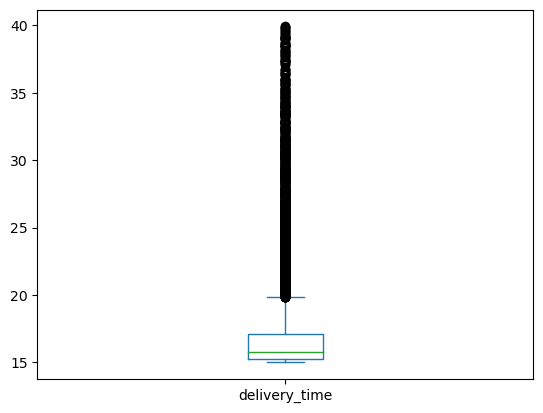

In [63]:
df = df[df["delivery_time"] < 40]
df["delivery_time"].plot(kind='box')

In [64]:
df["delivery_time"].quantile(0.95)

23.596276583333314

In [65]:
df[df["delivery_time"] > 31].shape

(226, 6)

### Observations

There were outliers which was affecting the data, more than 300 deliveries were above 40 mins and some even having 7000 mins.

After reducing the outliers by removing deliveries more than 40 mins, it came around 226 deliveries, so in total 557 pizzas were given free because of not delivering in less than 31 mins.

the 95th percentile after reducing the outliers was 23.59 mins which is good, but need to focus on delivery time overall since 557 free pizza is a huge loss for the franchise. 